### Recommendation Engine with Image Input

In [11]:
import os
import cv2
from PIL import Image
import numpy as np
import pickle
import tensorflow
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm

feature_list = np.array(pickle.load(open('embeddings.pkl', 'rb')))
filenames = pickle.load(open('filenames.pkl', 'rb'))

model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])


def feature_extraction(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result


def recommend(features, feature_list):
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)

    distances, indices = neighbors.kneighbors([features])

    return indices


def showimage(prod_id):
    image = cv2.imread(prod_id)
    RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(RGB_img)
    # plt.title(f" {imagelabel} :\n")
    plt.show()


def recommend_image(input_file):
    if os.path.isfile(input_file):
        # display the file
        display_image = Image.open(input_file)
        # feature extract
        features = feature_extraction(os.path.join(input_file), model)
        # st.text(features)
        # recommendention
        indices = recommend(features, feature_list)
        for i in indices[0]:
            showimage(filenames[i])

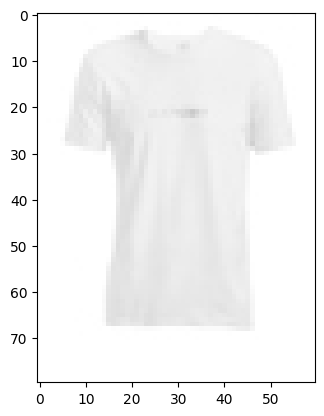

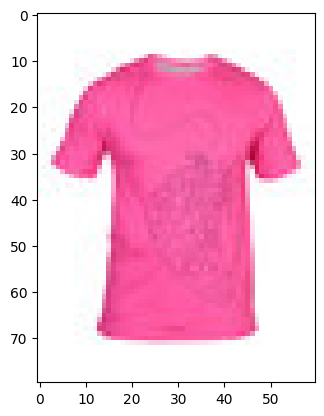

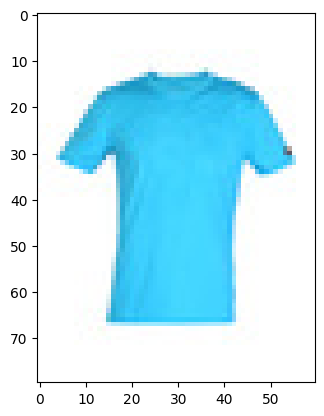

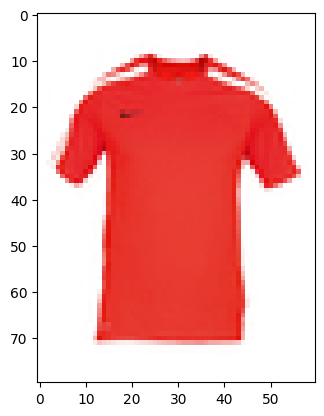

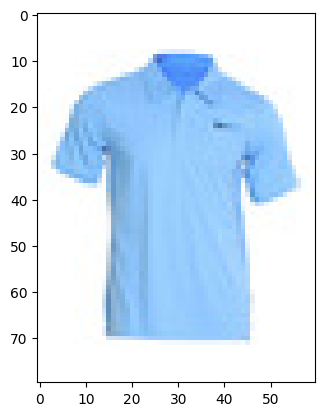

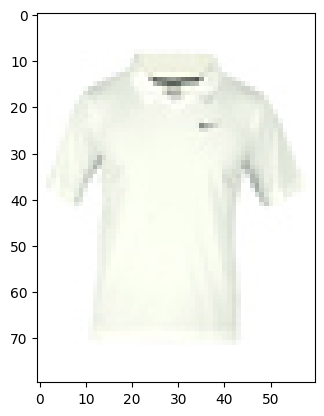

In [13]:
recommend_image("images/10000.jpg")